In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

<h1>Методы машинного обучения без учителя</h1>

Рассмотрим вторую группу алгоритмов – алгоритмы обучения без учителя. Это группа алгоритмов, в которых отсутствует учитель, указывающий ответ алгоритму. В машинном обучении в алгоритмах без учителя есть лишь входные данные и алгоритму необходимо извлечь знания из этих данных.

Мы рассмотрим две группы алгоритмов без учителя: 
- неконтролируемые преобразования данных;
- кластеризация.

**Неконтролируемые преобразования (unsupervised transformations)** – это алгоритмы, создающие новое представление данных, которое в отличие от исходного представления человеку или алгоритму машинного обучения будет обработать легче. Общераспространенное применение неконтролируемых преобразований – сокращение размерности. Мы берем высокоразмерное представление данных, состоящее из множества признаков, и находим новый способ представления этих данных, обобщая основные характеристики и получая меньшее количество признаков. Общераспространенное применение сокращения размерности – получение двумерного пространства в целях визуализации.

Еще одно применение неконтролируемых преобразований – поиск компонент, из которых «состоят» данные. Примером такого преобразования является выделение тем из коллекций текстовых документов. Здесь задача состоит в том, чтобы найти неизвестные темы, обсуждаемые в коллекции документов, а также выяснить, какие темы встречаются в каждом документе. Это может быть полезно для отслеживания в социальных сетях обсуждений таких тем, как выборы, контроль огнестрельного оружия или жизнь поп-звезд.

**Алгоритмы кластеризации (clustering algorithms)** разбивают данные на отдельные группы схожих между собой элементов. Рассмотрим пример загрузки фотографий в социальной сети. Часто вы формируете запросы типа «покажите мне все фотографии, на которых изображен Иван Петров». Для выполнения подобных запросов, администрация сайта, возможно, захочет сгруппировать фотографии, на которых изображен один и тот же человек. Однако при этом неизвестно, на каких загружаемых фотографиях кто показан, и неизвестно, какое количество различных пользователей присутствует на ваших фотографиях. Разумный подход заключался бы в том, чтобы извлечь все лица и разделить их на группы лиц, которые схожи между собой. Будем надеяться, что они соответствуют одному и тому же человеку и изображения в сгруппированном виде будут предъявлены вам.

**Проблемы алгоритмов машинного обучения без учителя**

Главная проблема машинного обучения без учителя – оценка полезности информации, извлеченной алгоритмом. Алгоритмы машинного обучения без учителя, как правило, применяются к данным, которые не содержат никаких меток, таким образом, мы не знаем, каким должен быть правильный ответ. Поэтому очень трудно судить о качестве работы модели.

Как следствие, алгоритмы машинного обучения без учителя часто используются в разведочных целях, когда специалист хочет лучше изучить сами данные. Еще одно общераспространенное применение алгоритмов машинного обучения без учителя заключается в том, что они служат этапом предварительной обработки данных для алгоритмов машинного обучения с учителем. Изучение нового представления данных иногда может повысить правильность алгоритмов машинного обучения с учителем или может привести к снижению времени вычислений и потребления объема памяти.

<h2>Неконтролируемые преобразования</h2>

К алгоритмам неконтролируемых преобразований относятся ранее изученные нами алгоритмы перемасштабирования в библиотеки <code>scikit-learn</code>, такие как <code>StandardScaler</code>, <code>RobustScaler</code>, <code>MinMaxScaler</code> и <code>Normalizer</code>.

**Поговорим об алгоритмах снижения размерности.**

Как мы уже говорили ранее, преобразование данных с помощью неконтролируемого обучения может быть обусловлено многими причинами. Наиболее распространенные причины – визуализация, сжатие данных, а также поиск такого представления данных, которое даст больше информации в ходе дальнейшей обработки.
Одним из самых простых и наиболее широко используемых алгоритмов контролируемого обучения является анализ главных компонент (principal component analysis, PCA).
Кроме того, мы рассмотрим еще один алгоритм – стохастического вложения соседей с распределением Стьюдента (t-distributed Stochastic Neighbor Embedding - TSNE), которое обычно используется для визуализации многомерных данных на двухмерное линейное пространство (обычную плоскость).

<h3>Метод главных компонент (РСА)</h3>

Анализ главных компонент представляет собой метод, который осуществляет вращение данных с тем, чтобы преобразованные признаки не коррелировали между собой. Часто это вращение сопровождается выбором подмножества новых признаков в зависимости от их важности с точки зрения интерпретации данных.
Рассмотрим применение данного алгоритма к синтетическому набору данных.



<img src="Pict/PCA.png" width=600  />

Первый рис. (вверху слева) показывает исходные точки данных, выделенные цветом для лучшей различимости (никак не связано, с какими либо метками классов или признаками). Алгоритм начинает работу с того, что сначала находит направление максимальной дисперсии, помеченное как «компонента 1». Речь идет о направлении (или векторе) данных, который содержит большую часть информации, или другими словами, направление, вдоль которого признаки коррелируют друг с другом сильнее всего. Затем алгоритм находит направление, которое содержит наибольшее количество информации, и при этом ортогонально (расположено под прямым углом) первому направлению. Внимание! В двумерном пространстве существует только одна возможная ориентация, расположенная под прямым углом, но в пространствах большей размерности может быть (бесконечно) много ортогональных направлений. Хотя эти две компоненты изображаются в виде стрелок, на самом деле не имеет значения, где начало, а где конец, мы могли бы нарисовать первую компоненту, выходящую из центра в верхний левый угол, а не в нижний правый.

Направления, найденные с помощью этого алгоритма, называются главными компонентами (principal components), поскольку они являются основными направлениями дисперсии данных. В целом максимально возможное количество главных компонент равно количеству исходных признаков.

**Внимание!** Размер пространства не меняется, новый признак есть линейная комбинация старых признаков.

**Немного математики**

Пусть у нас есть два признака $X_i$ и $X_j$. 

_Шаг первый._ Найдем дисперсии и ковариации исходных признаков, сделаем это с помощью матрицы ковариации. По определению ковариации, для двух признаков $X_i$ и $X_j$ их ковариация будет:

$$cov(X_i,X_j)=E(X_i-E(x_i))(X_j-E(X_j))=E(X_i X_j)-E(X_i)E(X_j)$$
где $E$ - математическое ожидание.

_Шаг второй._ Вспомним, что ковариация симметрична и ковариация вектора с самим собой будет равна его дисперсии.

Таким образом матрица ковариации представляет собой симметричную матрицу, где на диагонали лежат дисперсии соответствующих признаков, а вне диагонали — ковариации соответствующих пар признаков. В матричном виде, где $X = (X_1, X_2, ..., X_n)$ это матрица наблюдений, наша матрица ковариации будет выглядеть как:

$$cov (X,X) = E\left(\left(X-E(X)\right)\left(X-E(X)\right)^T\right)= E(X X^T)- E(X)E(X)^T$$

Если матрицу представить в виде $X = W^T W$, а это возможно, т.к. она симметрична, то из отношения Релея вытекает,  что что максимальная вариация нашего набора данных будет достигаться вдоль собственного вектора этой матрицы, соответствующего максимальному собственному значению.</br> 
Таким образом главные компоненты, на которые мы бы хотели спроецировать наши данные, являются просто собственными векторами соответствующих $k$-штук собственных значений этой матрицы.

_Шаг третий._ Умножаем матрицу данных $X$ на полученные компоненты и мы получим проекцию наших данных в ортогональном базисе этих компонент.</br> 

_Шаг четвертый._ Транспонируем нашу матрицу данных и матрицу векторов главных компонент. Тогда мы восстановим исходную выборку в том пространстве, из которого мы делали проекцию на компоненты. 

**Внимание!** Если количество компонент было меньше размерности исходного пространства, мы потеряем часть информации при таком преобразовании. 

![alt](pict/PCA-animation.gif) 


In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


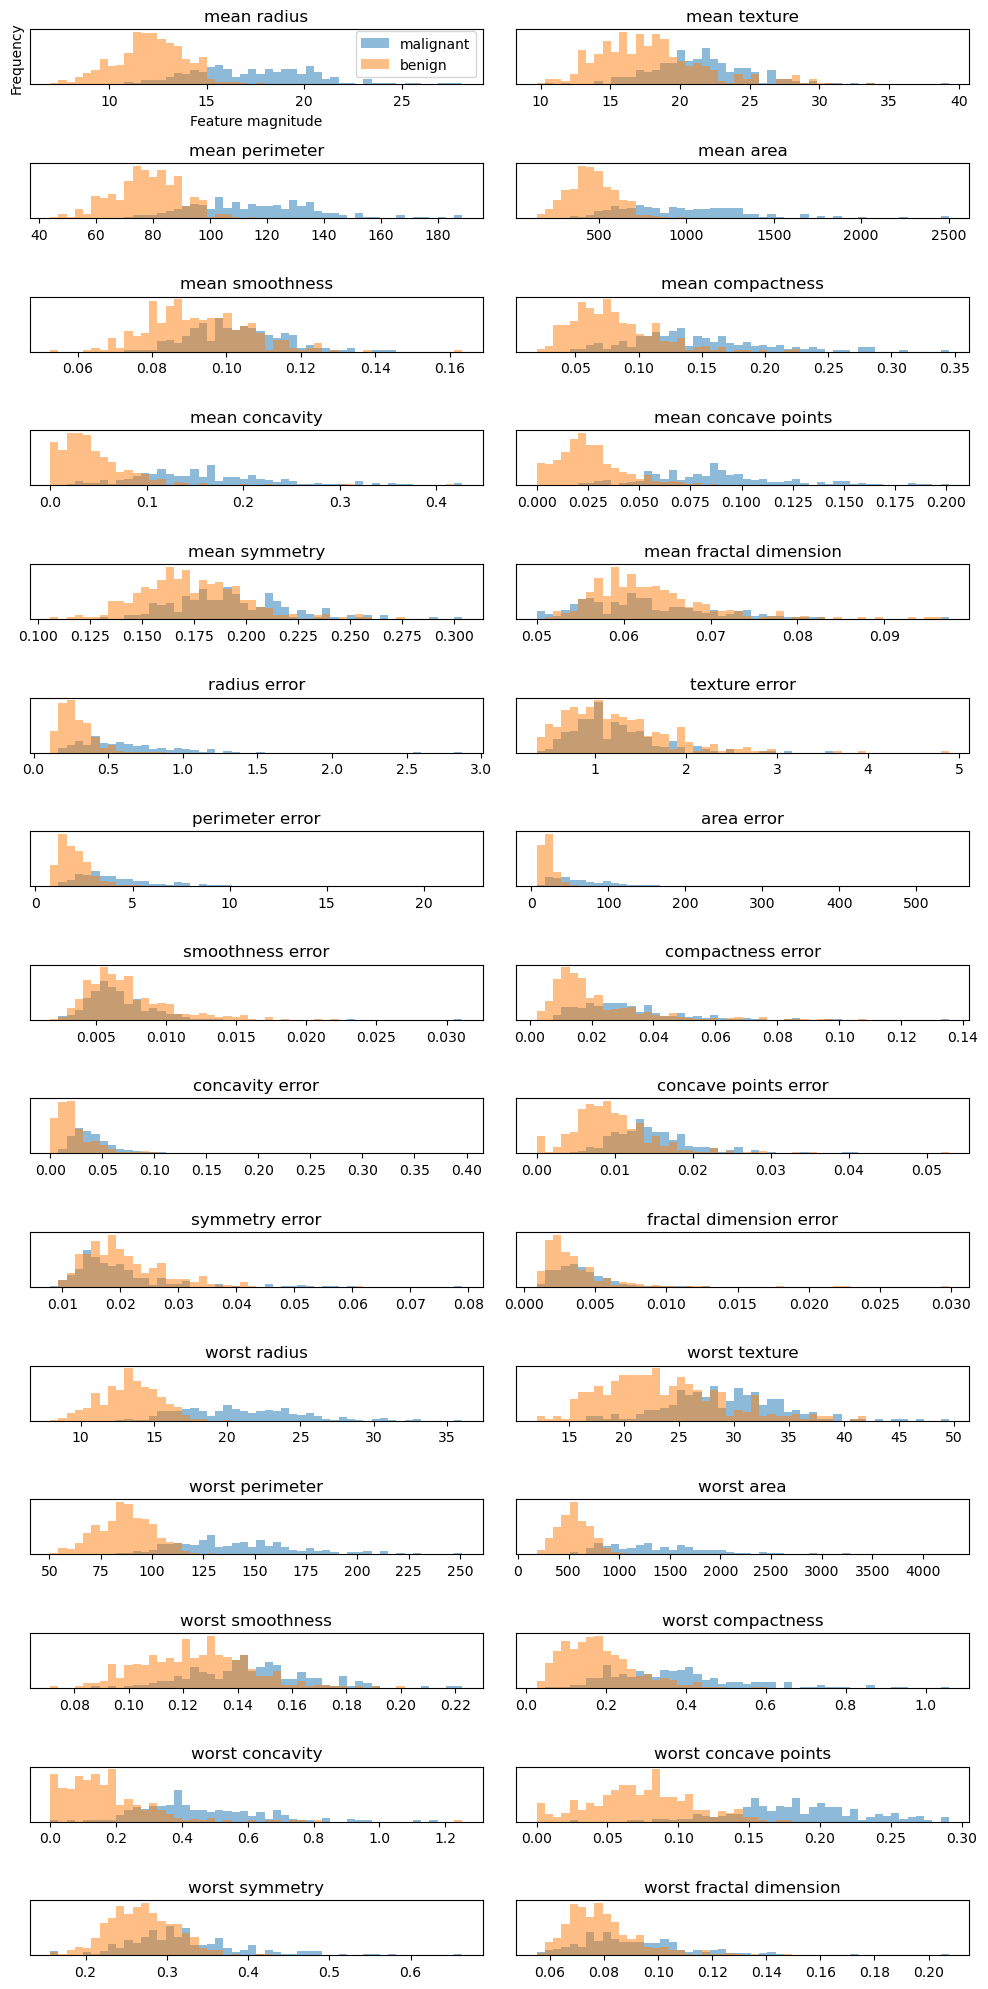

In [3]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    f, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

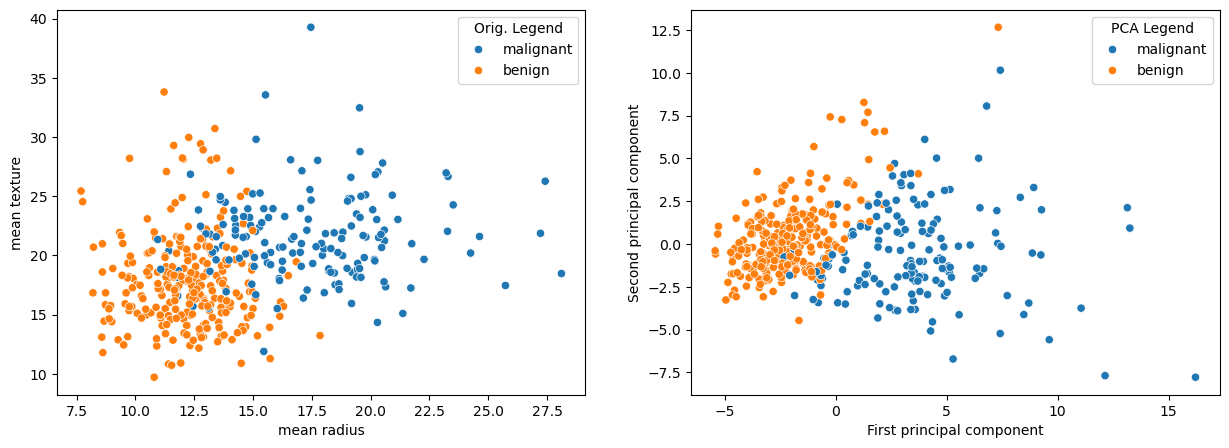

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=42)

pipe = make_pipeline( StandardScaler(),PCA(n_components=2) )
pipe.fit(X_train)
X_pca = pipe.transform(X_train)

fig = plt.figure(figsize=(15,5)) 

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

g_o =   sns.scatterplot( x=X_train[:, 0], y=X_train[:, 1], hue=y_train, ax = ax1);
g_pca = sns.scatterplot( x=X_pca[:, 0],   y=X_pca[:, 1],   hue=y_train, ax = ax2);

leg_handles = g_o.get_legend_handles_labels()[0]

g_o.legend(leg_handles, cancer.target_names, title='Orig. Legend')
g_pca.legend(leg_handles, cancer.target_names, title='PCA Legend')

ax1.set(xlabel = "mean radius", ylabel = "mean texture")
ax2.set(xlabel = "First principal component", ylabel = "Second principal component")
plt.show()


In [5]:
# Еще раз !!!! ЭТО  ВАЖНО !!! РАЗМЕРНОСТЬ
pca = pipe.named_steps['pca']
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [6]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21606219  0.10256791  0.22510819  0.21883451  0.14804204  0.23928857
   0.25918989  0.26246319  0.15070222  0.06038287  0.20440268  0.03117209
   0.20946517  0.19911163  0.02674616  0.16680985  0.15709119  0.18483612
   0.05078459  0.10095405  0.22574568  0.10634565  0.23560393  0.2235323
   0.13033081  0.20797412  0.23176851  0.25148098  0.12500401  0.12505041]
 [-0.23826294 -0.05282173 -0.22045406 -0.23448566  0.17369883  0.15545513
   0.0588006  -0.03833648  0.17583295  0.3635054  -0.1148424   0.09281816
  -0.09424561 -0.15653968  0.19724414  0.23628718  0.20051477  0.13534311
   0.15495272  0.28774197 -0.22335781 -0.03836196 -0.20240362 -0.22167808
   0.16714483  0.15270009  0.0983546  -0.00333393  0.11991076  0.28721882]]


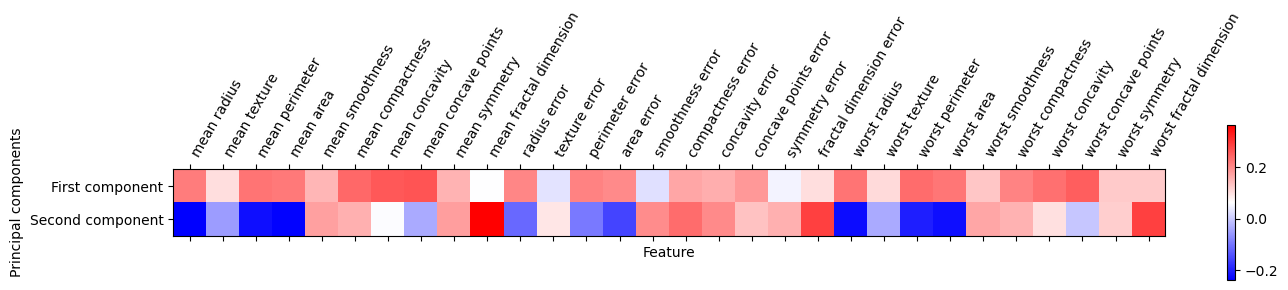

In [7]:
plt.matshow(pca.components_, cmap='bwr')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

<BarContainer object of 2 artists>

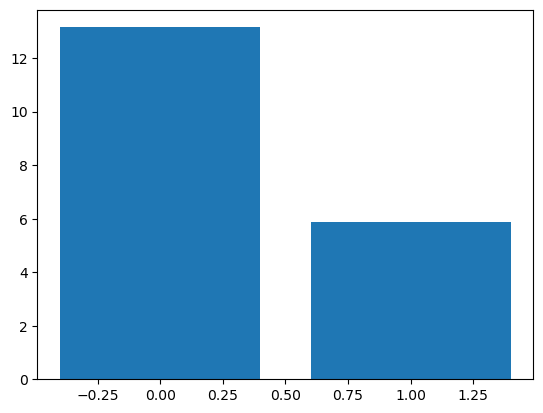

In [8]:
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_)

<h3>Сколько компонент отбирать?</h3>

Целевой подход к оценке числа главных компонент по необходимой доле объяснённой дисперсии формально применим всегда, однако неявно он предполагает, что нет разделения на "сигнал" и "шум", и любая заранее заданная точность имеет смысл. Поэтому часто более продуктивна иная эвристика, основывающаяся на гипотезе о наличии "сигнала" (сравнительно малая размерность, относительно большая амплитуда) и "шума" (большая размерность, относительно малая амплитуда). С этой точки зрения метод главных компонент работает как фильтр: сигнал содержится, в основном, в проекции на первые главные компоненты, а в остальных компонентах пропорция шума намного выше.

**Правило перегиба (визуально)**

PCA()

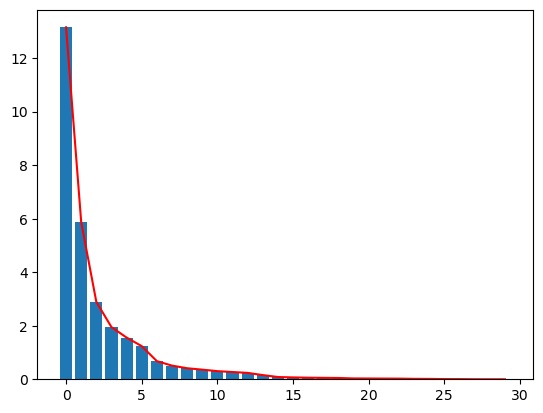

In [9]:
pipe = make_pipeline( StandardScaler(),PCA() )
pipe.fit(X_train)
########################
pca = pipe.named_steps['pca'] 
########################
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_);
plt.plot(pca_features,pca.explained_variance_, c ='red');

display(pipe.named_steps['pca'])

**Правило компонент объясняющих дисперсию (обычно берется в пределах 70-90%)**

In [10]:
print("Всего дисперсия   ", sum(pca.explained_variance_))
print("0.85 дисперсии   ", 0.85 * sum(pca.explained_variance_))

k=10
print("k-компонент объясняют дисперсию   ",sum(pca.explained_variance_[:k]))

Всего дисперсия    30.07058823529413
0.85 дисперсии    25.560000000000013
k-компонент объясняют дисперсию    28.623049389704295


PCA(n_components=0.8)

Дисперсия всего 25.424491095927173
Компонент всего 5


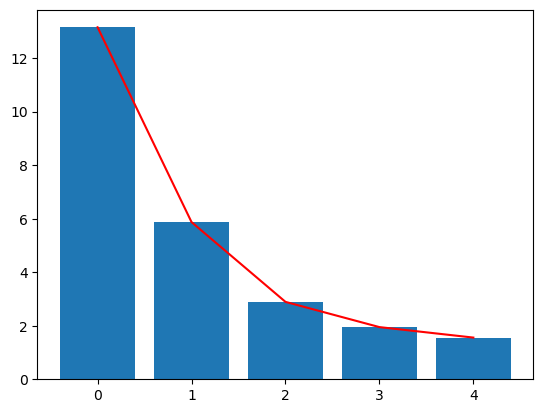

In [11]:
pipe = make_pipeline( StandardScaler(),PCA(n_components=0.8) )
pipe.fit(X_train)
########################
pca = pipe.named_steps['pca'] 
########################
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_);
plt.plot(pca_features,pca.explained_variance_, c ='red');

display(pipe.named_steps['pca'])
print("Дисперсия всего", sum(pca.explained_variance_))
print("Компонент всего", pca.n_components_)

In [24]:
from sklearn.ensemble import RandomForestClassifier

from datetime import datetime
import time
# Отличие только в скорости, так бывает, а почему кстати?

start_time = datetime.now()
rf  =  RandomForestClassifier(n_estimators = 1000, random_state=42, 
                              n_jobs=-1 
                             )

rf.fit(X_train,y_train)

score = rf.score(X_test, y_test)
print('без pca:',score)
print('время:',datetime.now() - start_time)
print()

start_time = datetime.now()
pipe_pca = make_pipeline(PCA(n_components=5),
                         RandomForestClassifier(n_estimators = 1000, 
                                                random_state=42,
                                                #n_jobs=-1
                                               ))
pca = pipe_pca.named_steps['pca']
rf_pca = pipe_pca.named_steps['randomforestclassifier']

pipe_pca.fit(X_train,y_train)


score = pipe_pca.score(X_test, y_test)
print('с pca:', score)
print('время:',datetime.now() - start_time)



без pca: 0.965034965034965
время: 0:00:00.545324

с pca: 0.965034965034965
время: 0:00:00.540392


In [25]:
display(rf.n_features_in_)
display(pca.components_.shape)
display(rf_pca.n_features_in_)

30

(5, 30)

5

## Существующие варианты алгоритмов РСА в библиотеке <code>Scikit-Learn</code>

1. Инкрементный РСА
2. Разряженный PCA
3. Ядерный PCA

**Инкрементный РСА <code>IncrementalPCA</code>**

В случае очень больших наборов данных, которые не умещаются в памяти, можно выполнять анализ по частям (инкрементно), работая с небольшими порциями - пакетами. Размер пакета можно устанавливать вручную или автоматически. Такой пакетный вариант РСА называется инкрементным. Как правило, результирующие главные компоненты стандартного и инкрементного вариантов РСА довольно близки между собой.

**Разряженный PCA <code>SparsePCA</code>**

Обычный алгоритм РСА осуществляет поиск линейных комбинаций среди всех входных переменных, уменьшая пространство исходных признаков в максимально возможной степени. Но в некоторых задачах машинного обучения с разряженными матрицами появляющихся при даммировании переменых, может оказаться выгодной небольшая разреженность признаков. Разновидность РСА, сохраняющая определенный уровень разреженности (контролируемый гиперпараметром <code>alpha</code>), называется разреженный РСА. Алгоритм разреженного РСА осуществляет поиск линейных комбинаций лишь в некоторых входных переменных, сужая пространство исходных признаков, но не так компактно, как стандартный РСА.

**Ядерный PCA <code>KernelPCA</code>**

Предидущие алгоритмы PCA  строили линейную проекцию исходных данных. Однако существует и нелинейное преобразование, например с уже известным нам ядром <code>RBF</code>. Ядерный РСА выявляет скрытое пространство признаков, в котором располагается большинство точек данных, и создает это скрытое пространство с намного меньшим количеством измерений по сравнению с оригинальным набором признаков. Такой метод особенно эффективен, когда исходный набор признаков не является линейно разделимым в исходной системе координат. Однако нам прийдется подбирать "ядерный коффицент" управляющей "силой" преобразования.

Нужно помнить, что если среднее в вашем наборе данных не имеет смысла, то нет смысла и в использовании PCA. 

## Сингулярное разложение <code>TruncatedSVD</code>.

Другой подход к обучению базовой структуре данных заключается в понижении ранга исходной матрицы признаков способом, допускающим возможность ее восстановления путем использования линейной комбинации некоторых из векторов, принадлежащих матрице меньшего ранга. Этот подход известен как сингулярное разложение (singular value decomposition - SVD).

Для генерирования матрицы меньшего ранга в методе SVD удерживаются векторы исходной матрицы, содержащие большую часть информации (т.е. те, которые имеют наибольшие сингулярные значения). Матрица пониженного ранга захватывает наиболее важные элементы в оригинальном пространстве признаков.

Все это очень напоминает метод РСА, в котором снижение размерности данных достигается за счет разложения ковариационной матрицы по собственным значениям, однако это два разных метода и результаты их отличны. 
